# 天气数据处理
# weather data traitment

In [ ]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import os

先读取数据

load dataset

In [2]:
data_dir = Path("./soil_moisture_daily")

assert data_dir.exists(), f"Folder not found: {data_dir.resolve()}"
csv_files = sorted(data_dir.glob("*.csv"))
print("Found CSV files:", [p.name for p in csv_files])

Found CSV files: ['Grandvillers-Canon.csv', 'Grandvillers-Robot-20.csv', 'Grandvillers-Robot.csv', 'Grandvillers_Sec.csv']


In [ ]:
# 读取所有 CSV 文件
soil_data = {}

for filename in os.listdir(data_dir):
    if filename.endswith(".csv"):
        file_path = os.path.join(data_dir, filename)
        
        # 去掉 .csv 作为 key
        key = filename.replace(".csv", "")
        
        # 读取 CSV
        df = pd.read_csv(file_path)
        
        soil_data[key] = df

In [ ]:
# 查看读取结果
print("已读取的 soil moisture 数据：")
for k, v in soil_data.items():
    print(f"{k}: {v.shape}")

已读取的 soil moisture 数据：
Grandvillers-Canon: (231, 15)
Grandvillers-Robot-20: (113, 15)
Grandvillers-Robot: (230, 15)
Grandvillers_Sec: (115, 15)


In [5]:
soil_data["Grandvillers_Sec"].head(120)

,date,sm_10cm,sm_20cm,sm_30cm,sm_40cm,sm_50cm,sm_60cm,irrig_mm,IRRAD,TMIN,TMAX,VAP,WIND,RAIN,probe_name
0,2025-05-05,27.252874,27.523145,28.171159,28.810984,29.345184,29.013414,0.0,21610.0,3.93,13.87,0.778064,11.35,0.0,Sec
1,2025-05-06,27.162943,27.446401,28.168567,28.799439,29.355969,29.048664,0.0,23260.0,5.13,16.03,0.818510,13.17,0.0,Sec
2,2025-05-07,27.049962,27.402677,28.143219,28.754250,29.330846,29.044714,0.0,17840.0,6.73,15.43,0.911688,11.02,0.0,Sec
3,2025-05-08,26.971620,27.357044,28.118459,28.716881,29.304277,29.031274,0.0,18450.0,7.03,18.23,0.873947,9.36,0.0,Sec
4,2025-05-09,26.879558,27.311503,28.082190,28.662257,29.261581,28.997891,0.0,24640.0,6.13,19.33,0.873275,7.36,0.0,Sec
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,2025-08-23,21.261939,23.858261,26.140767,26.873245,26.895062,26.441963,0.0,13110.0,9.93,21.97,1.227501,6.16,0.0,Sec
111,2025-08-24,21.201488,23.830990,26.123952,26.871428,26.920938,26.468601,0.0,22880.0,9.23,24.13,1.013118,7.19,0.0,Sec
112,2025-08-25,21.064658,23.803294,26.062412,26.812138,26.879811,26.443545,0.0,22010.0,9.33,27.97,1.033370,4.56,0.0,Sec
113,2025-08-26,20.940213,23.771539,26.016221,26.767966,26.842567,26.411280,0.0,17330.0,12.43,28.23,1.251412,7.04,0.0,Sec


把一个区域的不同probe得到的数据做平均，也就是去掉probe这列

Average the data obtained from different probes within a region, which means removing the probe column.

In [ ]:

# 按 date 聚合（同一天不同 probe_name -> 平均）
regions = list(soil_data.keys())
print("Regions:", regions)

weather_daily = {}  # 存放每个区域：按 date 聚合后的 df

for region in regions:
    df = soil_data[region].copy()

    # 基础清洗
    df["date"] = pd.to_datetime(df["date"])
    df = df.sort_values("date")

    # 数值列（自动找）
    value_cols = df.select_dtypes(include="number").columns.tolist()

    # 同一天不同 probe_name -> 平均
    df_mean = (
        df.groupby("date", as_index=False)[value_cols]
          .mean()
          .sort_values("date")
    )

    weather_daily[region] = df_mean
    print(region, "->", df.shape, "=>", df_mean.shape)

# check again
weather_daily[regions[3]].head(116)


Regions: ['Grandvillers-Canon', 'Grandvillers-Robot-20', 'Grandvillers-Robot', 'Grandvillers_Sec']
Grandvillers-Canon -> (231, 15) => (116, 14)
Grandvillers-Robot-20 -> (113, 15) => (113, 14)
Grandvillers-Robot -> (230, 15) => (115, 14)
Grandvillers_Sec -> (115, 15) => (115, 14)


,date,sm_10cm,sm_20cm,sm_30cm,sm_40cm,sm_50cm,sm_60cm,irrig_mm,IRRAD,TMIN,TMAX,VAP,WIND,RAIN
0,2025-05-05,27.252874,27.523145,28.171159,28.810984,29.345184,29.013414,0.0,21610.0,3.93,13.87,0.778064,11.35,0.0
1,2025-05-06,27.162943,27.446401,28.168567,28.799439,29.355969,29.048664,0.0,23260.0,5.13,16.03,0.818510,13.17,0.0
2,2025-05-07,27.049962,27.402677,28.143219,28.754250,29.330846,29.044714,0.0,17840.0,6.73,15.43,0.911688,11.02,0.0
3,2025-05-08,26.971620,27.357044,28.118459,28.716881,29.304277,29.031274,0.0,18450.0,7.03,18.23,0.873947,9.36,0.0
4,2025-05-09,26.879558,27.311503,28.082190,28.662257,29.261581,28.997891,0.0,24640.0,6.13,19.33,0.873275,7.36,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,2025-08-23,21.261939,23.858261,26.140767,26.873245,26.895062,26.441963,0.0,13110.0,9.93,21.97,1.227501,6.16,0.0
111,2025-08-24,21.201488,23.830990,26.123952,26.871428,26.920938,26.468601,0.0,22880.0,9.23,24.13,1.013118,7.19,0.0
112,2025-08-25,21.064658,23.803294,26.062412,26.812138,26.879811,26.443545,0.0,22010.0,9.33,27.97,1.033370,4.56,0.0
113,2025-08-26,20.940213,23.771539,26.016221,26.767966,26.842567,26.411280,0.0,17330.0,12.43,28.23,1.251412,7.04,0.0


删掉不要的土壤湿度,只考虑30cm的土壤湿度

Remove unnecessary soil moisture data and only consider the soil moisture at a depth of 30cm.

In [ ]:
# 要删除的土壤湿度列（cm）
cols_to_drop = [
    "sm_10cm",
    "sm_20cm",
    "sm_40cm",
    "sm_50cm",
    "sm_60cm",
]

for region in weather_daily:
    df = weather_daily[region]

    # 只删除真实存在的列，避免某个区域缺列时报错
    drop_cols_exist = [c for c in cols_to_drop if c in df.columns]

    weather_daily[region] = df.drop(columns=drop_cols_exist)

    print(region, "dropped:", drop_cols_exist)

Grandvillers-Canon dropped: ['sm_10cm', 'sm_20cm', 'sm_40cm', 'sm_50cm', 'sm_60cm']
Grandvillers-Robot-20 dropped: ['sm_10cm', 'sm_20cm', 'sm_40cm', 'sm_50cm', 'sm_60cm']
Grandvillers-Robot dropped: ['sm_10cm', 'sm_20cm', 'sm_40cm', 'sm_50cm', 'sm_60cm']
Grandvillers_Sec dropped: ['sm_10cm', 'sm_20cm', 'sm_40cm', 'sm_50cm', 'sm_60cm']


In [ ]:
# check again
weather_daily[regions[3]].head(116)

,date,sm_30cm,irrig_mm,IRRAD,TMIN,TMAX,VAP,WIND,RAIN
0,2025-05-05,28.171159,0.0,21610.0,3.93,13.87,0.778064,11.35,0.0
1,2025-05-06,28.168567,0.0,23260.0,5.13,16.03,0.818510,13.17,0.0
2,2025-05-07,28.143219,0.0,17840.0,6.73,15.43,0.911688,11.02,0.0
3,2025-05-08,28.118459,0.0,18450.0,7.03,18.23,0.873947,9.36,0.0
4,2025-05-09,28.082190,0.0,24640.0,6.13,19.33,0.873275,7.36,0.0
...,...,...,...,...,...,...,...,...,...
110,2025-08-23,26.140767,0.0,13110.0,9.93,21.97,1.227501,6.16,0.0
111,2025-08-24,26.123952,0.0,22880.0,9.23,24.13,1.013118,7.19,0.0
112,2025-08-25,26.062412,0.0,22010.0,9.33,27.97,1.033370,4.56,0.0
113,2025-08-26,26.016221,0.0,17330.0,12.43,28.23,1.251412,7.04,0.0


## 对齐时间步
把时间步和ndvi对齐，把两个时间步之间的天气数据做平均或和，具体按照：
土壤湿度：sm_30cm_mean
水分输入：RAIN_sum irrig_mm_sum
能量：IRRAD_sum
温度：TMIN_mean TMAX_mean
大气：VAP_mean
风：WIND_mean

## Align the time steps
Align the time steps with ndvi, and average or sum the weather data between two time steps, specifically according to: Soil moisture: sm_30cm_mean; Moisture input: RAIN_sum, irrig_mm_sum; Energy: IRRAD_sum; Temperature: TMIN_mean, TMAX_mean; Atmosphere: VAP_mean; Wind: WIND_mean

In [ ]:
import xarray as xr

ndvi_precombine_path = "ndvi_precombine.nc"  
ds_candidate = xr.open_dataset(ndvi_precombine_path)
print("Opened dataset from:", ndvi_precombine_path)

# 3) 兼容 time 维度叫 time 或 t
time_dim = "time" if "time" in ds_candidate.coords else ("t" if "t" in ds_candidate.coords else None)
if time_dim is None:
    raise ValueError(f"Dataset coords has no 'time' or 't'. Available coords: {list(ds_candidate.coords)}")

target_t = pd.to_datetime(ds_candidate[time_dim].values)
print("NDVI target_t:", target_t.min(), "->", target_t.max(), "len =", len(target_t))
target_t[:5]

Opened dataset from: ndvi_precombine.nc
NDVI target_t: 2025-05-07 00:00:00 -> 2025-08-23 00:00:00 len = 37


DatetimeIndex(['2025-05-07', '2025-05-10', '2025-05-13', '2025-05-16',
               '2025-05-19'],
              dtype='datetime64[ns]', freq=None)

In [ ]:
import numpy as np

agg_rules = {
    "sm_30cm": "mean",
    "RAIN": "sum",
    "irrig_mm": "sum",
    "IRRAD": "sum",
    "TMIN": "mean",
    "TMAX": "mean",
    "VAP": "mean",
    "WIND": "mean",
}

In [ ]:
def aggregate_to_ndvi_steps(df_daily, target_t, agg_rules):
    df = df_daily.copy()
    df["date"] = pd.to_datetime(df["date"])
    df = df.sort_values("date").set_index("date")

    out_rows = []

    for i, t0 in enumerate(target_t):
        # 区间 [t0, t1)
        if i < len(target_t) - 1:
            t1 = target_t[i + 1]
            block = df.loc[(df.index >= t0) & (df.index < t1)]
        else:
            # 最后一个时间步：只取当天（避免需要未来数据）
            block = df.loc[df.index == t0]

        row = {"time": t0}

        for col, how in agg_rules.items():
            out_col = f"{col}_{how}"

            if col not in df.columns:
                row[out_col] = np.nan
                continue

            if len(block) == 0:
                row[out_col] = np.nan
            else:
                if how == "mean":
                    row[out_col] = block[col].mean(skipna=True)
                elif how == "sum":
                    row[out_col] = block[col].sum(skipna=True)
                else:
                    raise ValueError("Unknown agg method: " + str(how))

        out_rows.append(row)

    return pd.DataFrame(out_rows)

In [ ]:
weather_on_ndvi_t = {}

for region in regions:
    df_daily = weather_daily[region]  # 你已经：probe 平均 + 删掉 sm_10/20/40/50/60
    df_agg = aggregate_to_ndvi_steps(df_daily, target_t, agg_rules)

    weather_on_ndvi_t[region] = df_agg
    print(region, "->", df_agg.shape)

# check again
weather_on_ndvi_t[regions[0]].head()\

Grandvillers-Canon -> (37, 9)
Grandvillers-Robot-20 -> (37, 9)
Grandvillers-Robot -> (37, 9)
Grandvillers_Sec -> (37, 9)


,time,sm_30cm_mean,RAIN_sum,irrig_mm_sum,IRRAD_sum,TMIN_mean,TMAX_mean,VAP_mean,WIND_mean
0,2025-05-07,28.637894,0.00,0.0,60930.0,6.630000,17.663333,0.886303,9.246667
1,2025-05-10,28.489225,4.06,0.0,66060.0,9.023333,21.723333,1.195390,5.583333
2,2025-05-13,28.223133,0.00,0.0,62900.0,9.176667,21.676667,1.121417,7.540000
3,2025-05-16,27.944497,0.00,0.0,66810.0,7.300000,19.496667,0.973773,9.036667
4,2025-05-19,27.368503,0.51,25.0,65470.0,7.176667,21.323333,0.998802,6.480000


## 给天气数据加空间坐标
现在的天气数据是没有空间坐标的，我手动将ndvi的所有像素值赋上天气数据

## Adding Spatial Coordinates to Weather Data 
Currently, the weather data lacks spatial coordinates. I manually assigned all pixel values ​​from the ndvi file to the weather data.

In [ ]:
import xarray as xr
import numpy as np

# 仍然用前面拿到 NDVI 的 dataset：ds_candidate
# 找 NDVI 变量名（ndvi）
da_ndvi = ds_candidate["ndvi"]

print("NDVI dims:", da_ndvi.dims)
print("NDVI shape:", da_ndvi.shape)

# 取空间维度名（兼容 x/y 或 lon/lat）
# 你之前的通常是 (time, y, x) 或 (t, y, x)
spatial_dims = [d for d in da_ndvi.dims if d not in ["time"]]

dim1, dim2 = spatial_dims  # 通常是 y, x
print("Spatial dims:", dim1, dim2)

y_coords = ds_candidate[dim1].values
x_coords = ds_candidate[dim2].values

ny, nx = len(y_coords), len(x_coords)
print("Grid size:", ny, nx)


NDVI dims: ('time', 'y', 'x')
NDVI shape: (37, 49, 76)
Spatial dims: y x
Grid size: 49 76


先用sec数据填满整个图

First, fill the entire graph with sec data.

In [ ]:
# 找到sec region
sec_region = "Grandvillers_Sec"
print("Using sec region:", sec_region)

df_sec = weather_on_ndvi_t[sec_region].copy()
print(df_sec.shape)
df_sec.head()


Using sec region: Grandvillers_Sec
(37, 9)


,time,sm_30cm_mean,RAIN_sum,irrig_mm_sum,IRRAD_sum,TMIN_mean,TMAX_mean,VAP_mean,WIND_mean
0,2025-05-07,28.114623,0.00,0.0,60930.0,6.630000,17.663333,0.886303,9.246667
1,2025-05-10,27.973084,4.06,0.0,66060.0,9.023333,21.723333,1.195390,5.583333
2,2025-05-13,27.741959,0.00,0.0,62900.0,9.176667,21.676667,1.121417,7.540000
3,2025-05-16,27.453488,0.00,0.0,66810.0,7.300000,19.496667,0.973773,9.036667
4,2025-05-19,26.864189,0.51,25.0,65470.0,7.176667,21.323333,0.998802,6.480000


格式里加上空间坐标

In [ ]:
# 除 time 之外的所有列，都是要空间化的天气变量
feat_cols = [c for c in df_sec.columns if c != "time"]
print("Features:", feat_cols)

# 转成 numpy: (T, C)
vals = df_sec[feat_cols].to_numpy(dtype=np.float32)
T, C = vals.shape
print("T, C =", T, C)

# 扩展到 (T, ny, nx, C)
grid = vals[:, None, None, :] * np.ones((T, ny, nx, C), dtype=np.float32)

print("grid shape:", grid.shape)

Features: ['sm_30cm_mean', 'RAIN_sum', 'irrig_mm_sum', 'IRRAD_sum', 'TMIN_mean', 'TMAX_mean', 'VAP_mean', 'WIND_mean']
T, C = 37 8
grid shape: (37, 49, 76, 8)


In [ ]:
# time 坐标名要跟你的 NDVI 一致：time 
time_dim = "time"

# 生成 Dataset，每个变量一个 DataArray: (time, y, x)
data_vars = {}
for i, col in enumerate(feat_cols):
    data_vars[col] = xr.DataArray(
        grid[:, :, :, i],
        dims=(time_dim, dim1, dim2),
        coords={
            time_dim: target_t,
            dim1: y_coords,
            dim2: x_coords
        }
    )

ds_weather_sec = xr.Dataset(data_vars)

print(ds_weather_sec)


<xarray.Dataset> Size: 4MB
Dimensions:       (time: 37, y: 49, x: 76)
Coordinates:
  * time          (time) datetime64[ns] 296B 2025-05-07 ... 2025-08-23
  * y             (y) float64 392B 5.48e+06 5.48e+06 ... 5.48e+06 5.48e+06
  * x             (x) float64 608B 4.72e+05 4.72e+05 ... 4.727e+05 4.727e+05
Data variables:
    sm_30cm_mean  (time, y, x) float32 551kB 28.11 28.11 28.11 ... 26.14 26.14
    RAIN_sum      (time, y, x) float32 551kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    irrig_mm_sum  (time, y, x) float32 551kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    IRRAD_sum     (time, y, x) float32 551kB 6.093e+04 6.093e+04 ... 1.311e+04
    TMIN_mean     (time, y, x) float32 551kB 6.63 6.63 6.63 ... 9.93 9.93 9.93
    TMAX_mean     (time, y, x) float32 551kB 17.66 17.66 17.66 ... 21.97 21.97
    VAP_mean      (time, y, x) float32 551kB 0.8863 0.8863 ... 1.228 1.228
    WIND_mean     (time, y, x) float32 551kB 9.247 9.247 9.247 ... 6.16 6.16


现在赋canon区域的天气数据

Now assigning weather data for the Canon area

In [ ]:
# 处理 Grandvillers-Canon 区域，先取到canon区域的数据
df_canon = weather_on_ndvi_t["Grandvillers-Canon"].copy()
print(df_canon.shape)
df_canon.head()


(37, 9)


,time,sm_30cm_mean,RAIN_sum,irrig_mm_sum,IRRAD_sum,TMIN_mean,TMAX_mean,VAP_mean,WIND_mean
0,2025-05-07,28.637894,0.00,0.0,60930.0,6.630000,17.663333,0.886303,9.246667
1,2025-05-10,28.489225,4.06,0.0,66060.0,9.023333,21.723333,1.195390,5.583333
2,2025-05-13,28.223133,0.00,0.0,62900.0,9.176667,21.676667,1.121417,7.540000
3,2025-05-16,27.944497,0.00,0.0,66810.0,7.300000,19.496667,0.973773,9.036667
4,2025-05-19,27.368503,0.51,25.0,65470.0,7.176667,21.323333,0.998802,6.480000


In [ ]:
# 给 Canon 加上空间维度
feat_cols = [c for c in df_canon.columns if c != "time"]  # 和 Sec 一样
vals_canon = df_canon[feat_cols].to_numpy(dtype=np.float32)  # (T, C)
T, C = vals_canon.shape

grid_canon = vals_canon[:, None, None, :] * np.ones((T, ny, nx, C), dtype=np.float32)

# 生成 Canon 的 Dataset（dims/coords 对齐 NDVI）
data_vars_canon = {}
for i, col in enumerate(feat_cols):
    data_vars_canon[col] = xr.DataArray(
        grid_canon[:, :, :, i],
        dims=(time_dim, dim1, dim2),
        coords={time_dim: target_t, dim1: y_coords, dim2: x_coords}
    )

ds_weather_canon = xr.Dataset(data_vars_canon)
print(ds_weather_canon)


<xarray.Dataset> Size: 4MB
Dimensions:       (time: 37, y: 49, x: 76)
Coordinates:
  * time          (time) datetime64[ns] 296B 2025-05-07 ... 2025-08-23
  * y             (y) float64 392B 5.48e+06 5.48e+06 ... 5.48e+06 5.48e+06
  * x             (x) float64 608B 4.72e+05 4.72e+05 ... 4.727e+05 4.727e+05
Data variables:
    sm_30cm_mean  (time, y, x) float32 551kB 28.64 28.64 28.64 ... 26.17 26.17
    RAIN_sum      (time, y, x) float32 551kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    irrig_mm_sum  (time, y, x) float32 551kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    IRRAD_sum     (time, y, x) float32 551kB 6.093e+04 6.093e+04 ... 1.311e+04
    TMIN_mean     (time, y, x) float32 551kB 6.63 6.63 6.63 ... 9.93 9.93 9.93
    TMAX_mean     (time, y, x) float32 551kB 17.66 17.66 17.66 ... 21.97 21.97
    VAP_mean      (time, y, x) float32 551kB 0.8863 0.8863 ... 1.228 1.228
    WIND_mean     (time, y, x) float32 551kB 9.247 9.247 9.247 ... 6.16 6.16


用像素点坐标围出canon的区域，把这个区域里的天气数据替换成canon的

Use pixel coordinates to delineate the Canon region, and replace the weather data within this region with Canon's data.

In [ ]:
from matplotlib.path import Path

# 你的四个像素点 (x, y)
poly_xy = np.array([
    (73, 41),
    (23, 2),
    (20, 9),
    (62, 42),
], dtype=np.float32)

# 生成整张图每个像素的 (x,y) 坐标网格（注意：x 对应列 index，y 对应行 index）
xx, yy = np.meshgrid(np.arange(nx), np.arange(ny))  # shapes (ny, nx)
points = np.vstack([xx.ravel(), yy.ravel()]).T       # (ny*nx, 2)

mask_2d = Path(poly_xy).contains_points(points).reshape(ny, nx)  # (ny, nx) bool

print("Masked pixels:", int(mask_2d.sum()), "out of", ny*nx)


Masked pixels: 435 out of 3724


In [ ]:
ds_weather_mix = ds_weather_sec.copy(deep=True)

mask_3d = xr.DataArray(
    mask_2d,
    dims=(dim1, dim2),
    coords={dim1: y_coords, dim2: x_coords}
)

for var in feat_cols:
    # where(mask=True) 取 canon，否则取 sec
    ds_weather_mix[var] = xr.where(mask_3d, ds_weather_canon[var], ds_weather_sec[var])

print(ds_weather_mix)

<xarray.Dataset> Size: 4MB
Dimensions:       (time: 37, y: 49, x: 76)
Coordinates:
  * time          (time) datetime64[ns] 296B 2025-05-07 ... 2025-08-23
  * y             (y) float64 392B 5.48e+06 5.48e+06 ... 5.48e+06 5.48e+06
  * x             (x) float64 608B 4.72e+05 4.72e+05 ... 4.727e+05 4.727e+05
Data variables:
    sm_30cm_mean  (y, x, time) float32 551kB 28.11 27.97 27.74 ... 26.14 26.14
    RAIN_sum      (y, x, time) float32 551kB 0.0 4.06 0.0 0.0 ... 0.51 3.81 0.0
    irrig_mm_sum  (y, x, time) float32 551kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    IRRAD_sum     (y, x, time) float32 551kB 6.093e+04 6.606e+04 ... 1.311e+04
    TMIN_mean     (y, x, time) float32 551kB 6.63 9.023 9.177 ... 12.9 9.93
    TMAX_mean     (y, x, time) float32 551kB 17.66 21.72 21.68 ... 22.14 21.97
    VAP_mean      (y, x, time) float32 551kB 0.8863 1.195 1.121 ... 1.384 1.228
    WIND_mean     (y, x, time) float32 551kB 9.247 5.583 7.54 ... 11.45 6.16


赋Robot区域的天气数据

Assigning weather data to Robot area

In [ ]:
df_robot = weather_on_ndvi_t["Grandvillers-Robot"].copy()
print(df_robot.shape)
df_robot.head()

(37, 9)


,time,sm_30cm_mean,RAIN_sum,irrig_mm_sum,IRRAD_sum,TMIN_mean,TMAX_mean,VAP_mean,WIND_mean
0,2025-05-07,28.896539,0.00,0.0,60930.0,6.630000,17.663333,0.886303,9.246667
1,2025-05-10,28.753157,4.06,0.0,66060.0,9.023333,21.723333,1.195390,5.583333
2,2025-05-13,28.454985,0.00,0.0,62900.0,9.176667,21.676667,1.121417,7.540000
3,2025-05-16,27.898164,0.00,0.0,66810.0,7.300000,19.496667,0.973773,9.036667
4,2025-05-19,27.017718,0.51,25.0,65470.0,7.176667,21.323333,0.998802,6.480000


In [ ]:
# 给 Robot 加上空间维度
feat_cols = [c for c in df_robot.columns if c != "time"]
vals_robot = df_robot[feat_cols].to_numpy(dtype=np.float32)  # (T, C)
T, C = vals_robot.shape

grid_robot = vals_robot[:, None, None, :] * np.ones((T, ny, nx, C), dtype=np.float32)

data_vars_robot = {}
for i, col in enumerate(feat_cols):
    data_vars_robot[col] = xr.DataArray(
        grid_robot[:, :, :, i],
        dims=(time_dim, dim1, dim2),
        coords={time_dim: target_t, dim1: y_coords, dim2: x_coords}
    )

ds_weather_robot = xr.Dataset(data_vars_robot)
print(ds_weather_robot)


<xarray.Dataset> Size: 4MB
Dimensions:       (time: 37, y: 49, x: 76)
Coordinates:
  * time          (time) datetime64[ns] 296B 2025-05-07 ... 2025-08-23
  * y             (y) float64 392B 5.48e+06 5.48e+06 ... 5.48e+06 5.48e+06
  * x             (x) float64 608B 4.72e+05 4.72e+05 ... 4.727e+05 4.727e+05
Data variables:
    sm_30cm_mean  (time, y, x) float32 551kB 28.9 28.9 28.9 ... 26.32 26.32
    RAIN_sum      (time, y, x) float32 551kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    irrig_mm_sum  (time, y, x) float32 551kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    IRRAD_sum     (time, y, x) float32 551kB 6.093e+04 6.093e+04 ... 1.311e+04
    TMIN_mean     (time, y, x) float32 551kB 6.63 6.63 6.63 ... 9.93 9.93 9.93
    TMAX_mean     (time, y, x) float32 551kB 17.66 17.66 17.66 ... 21.97 21.97
    VAP_mean      (time, y, x) float32 551kB 0.8863 0.8863 ... 1.228 1.228
    WIND_mean     (time, y, x) float32 551kB 9.247 9.247 9.247 ... 6.16 6.16


用像素点坐标围出robot的区域，把这个区域里的天气数据替换成robot的

Define the robot's region using pixel coordinates, and replace the weather data within this region with the robot's data.

In [ ]:

poly_robot_xy = np.array([
    (51, 44),
    (17, 17),
    (19, 10),
    (60, 42),
], dtype=np.float32)

xx, yy = np.meshgrid(np.arange(nx), np.arange(ny))
points = np.vstack([xx.ravel(), yy.ravel()]).T

mask_robot_2d = Path(poly_robot_xy).contains_points(points).reshape(ny, nx)

print("Robot masked pixels:", int(mask_robot_2d.sum()), "out of", ny*nx)

mask_robot_2d_da = xr.DataArray(
    mask_robot_2d,
    dims=(dim1, dim2),
    coords={dim1: y_coords, dim2: x_coords}
)

# 直接在已有 mix 上再覆盖一层 robot
for var in feat_cols:
    ds_weather_mix[var] = xr.where(mask_robot_2d_da, ds_weather_robot[var], ds_weather_mix[var])

print("Updated ds_weather_mix with robot polygon.")


Robot masked pixels: 333 out of 3724
Updated ds_weather_mix with robot polygon.


赋Robot-20区域的天气数据

Now for Robot-20 region

In [ ]:
df_robot20 = weather_on_ndvi_t["Grandvillers-Robot-20"].copy()
print(df_robot20.shape)
df_robot20.head()

(37, 9)


,time,sm_30cm_mean,RAIN_sum,irrig_mm_sum,IRRAD_sum,TMIN_mean,TMAX_mean,VAP_mean,WIND_mean
0,2025-05-07,28.672205,0.00,0.0,60930.0,6.630000,17.663333,0.886303,9.246667
1,2025-05-10,28.598708,4.06,0.0,66060.0,9.023333,21.723333,1.195390,5.583333
2,2025-05-13,28.532298,0.00,0.0,62900.0,9.176667,21.676667,1.121417,7.540000
3,2025-05-16,28.461329,0.00,0.0,66810.0,7.300000,19.496667,0.973773,9.036667
4,2025-05-19,28.287261,0.51,25.0,65470.0,7.176667,21.323333,0.998802,6.480000


In [ ]:

feat_cols = [c for c in df_robot20.columns if c != "time"]
vals_robot20 = df_robot20[feat_cols].to_numpy(dtype=np.float32)  # (T, C)
T, C = vals_robot20.shape

grid_robot20 = vals_robot20[:, None, None, :] * np.ones((T, ny, nx, C), dtype=np.float32)

data_vars_robot20 = {}
for i, col in enumerate(feat_cols):
    data_vars_robot20[col] = xr.DataArray(
        grid_robot20[:, :, :, i],
        dims=(time_dim, dim1, dim2),
        coords={time_dim: target_t, dim1: y_coords, dim2: x_coords}
    )

ds_weather_robot20 = xr.Dataset(data_vars_robot20)
print(ds_weather_robot20)


<xarray.Dataset> Size: 4MB
Dimensions:       (time: 37, y: 49, x: 76)
Coordinates:
  * time          (time) datetime64[ns] 296B 2025-05-07 ... 2025-08-23
  * y             (y) float64 392B 5.48e+06 5.48e+06 ... 5.48e+06 5.48e+06
  * x             (x) float64 608B 4.72e+05 4.72e+05 ... 4.727e+05 4.727e+05
Data variables:
    sm_30cm_mean  (time, y, x) float32 551kB 28.67 28.67 28.67 ... 28.02 28.02
    RAIN_sum      (time, y, x) float32 551kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    irrig_mm_sum  (time, y, x) float32 551kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    IRRAD_sum     (time, y, x) float32 551kB 6.093e+04 6.093e+04 ... 1.311e+04
    TMIN_mean     (time, y, x) float32 551kB 6.63 6.63 6.63 ... 9.93 9.93 9.93
    TMAX_mean     (time, y, x) float32 551kB 17.66 17.66 17.66 ... 21.97 21.97
    VAP_mean      (time, y, x) float32 551kB 0.8863 0.8863 ... 1.228 1.228
    WIND_mean     (time, y, x) float32 551kB 9.247 9.247 9.247 ... 6.16 6.16


用像素点坐标围出robot-20的区域，把这个区域里的天气数据替换成robot-20的

In [ ]:
from matplotlib.path import Path
import numpy as np

poly_robot20_xy = np.array([
    (46, 41),
    (17, 18),
    (15, 20),
    (44, 43),
], dtype=np.float32)

xx, yy = np.meshgrid(np.arange(nx), np.arange(ny))
points = np.vstack([xx.ravel(), yy.ravel()]).T

mask_robot20_2d = Path(poly_robot20_xy).contains_points(points).reshape(ny, nx)

print("robot-20 masked pixels:", int(mask_robot20_2d.sum()), "out of", ny*nx)

mask_robot20_da = xr.DataArray(
    mask_robot20_2d,
    dims=(dim1, dim2),
    coords={dim1: y_coords, dim2: x_coords}
)

for var in feat_cols:
    ds_weather_mix[var] = xr.where(mask_robot20_da, ds_weather_robot20[var], ds_weather_mix[var])

print("Updated ds_weather_mix with robot-20 polygon.")



robot-20 masked pixels: 103 out of 3724
Updated ds_weather_mix with robot-20 polygon.


可视化检查

Visualisation 4 different regions

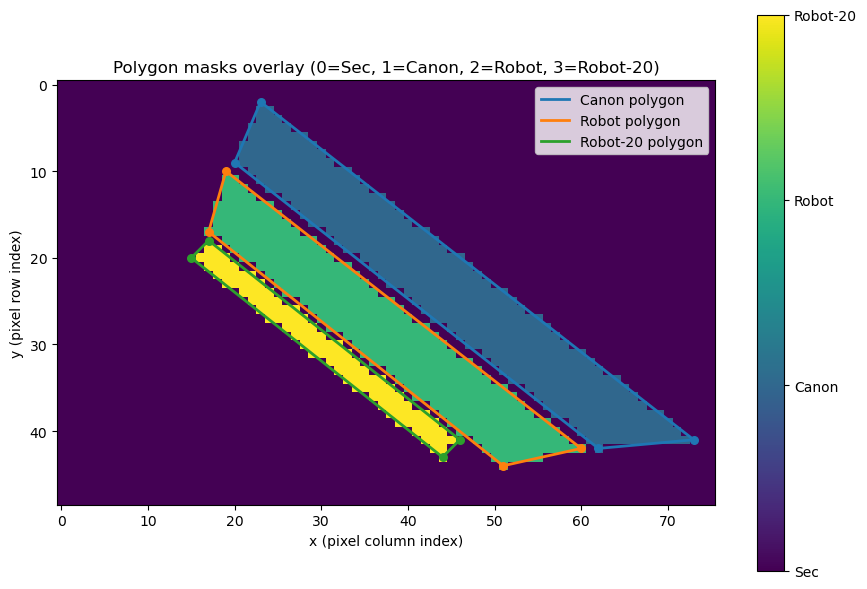

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1) 叠加图层（优先级：robot-20 > robot > canon > sec背景）
overlay = np.zeros((ny, nx), dtype=np.uint8)
overlay[mask_2d] = 1
overlay[mask_robot_2d] = 2
overlay[mask_robot20_2d] = 3

# 2) 画图（用像素坐标系：x=列，y=行）
plt.figure(figsize=(9, 6))
im = plt.imshow(overlay, origin="upper", interpolation="nearest")
plt.title("Polygon masks overlay (0=Sec, 1=Canon, 2=Robot, 3=Robot-20)")
plt.xlabel("x (pixel column index)")
plt.ylabel("y (pixel row index)")

# 3) 把三组 polygon 的边界画出来（闭合）
def plot_poly(poly, label):
    poly = np.asarray(poly)
    closed = np.vstack([poly, poly[0]])  # 闭合
    plt.plot(closed[:, 0], closed[:, 1], linewidth=2, label=label)
    plt.scatter(poly[:, 0], poly[:, 1], s=30)

plot_poly(poly_xy, "Canon polygon")
plot_poly(poly_robot_xy, "Robot polygon")
plot_poly(poly_robot20_xy, "Robot-20 polygon")

# 4) colorbar 显示数值含义
cbar = plt.colorbar(im)
cbar.set_ticks([0, 1, 2, 3])
cbar.set_ticklabels(["Sec", "Canon", "Robot", "Robot-20"])

plt.legend(loc="upper right")
plt.tight_layout()
plt.show()


In [ ]:
# 最终检查：维度 & 坐标
print(ds_weather_mix)

# 确保维度顺序和 ndvi_precombine 一样
# （xarray 通常不强制顺序，但我们主动对齐）
ds_weather_mix = ds_weather_mix.transpose("time", "y", "x")

# 保存为 weather_precombine.nc
out_path = "weather_precombine.nc"
ds_weather_mix.to_netcdf(out_path)

print("Saved:", out_path)


<xarray.Dataset> Size: 4MB
Dimensions:       (time: 37, y: 49, x: 76)
Coordinates:
  * time          (time) datetime64[ns] 296B 2025-05-07 ... 2025-08-23
  * y             (y) float64 392B 5.48e+06 5.48e+06 ... 5.48e+06 5.48e+06
  * x             (x) float64 608B 4.72e+05 4.72e+05 ... 4.727e+05 4.727e+05
Data variables:
    sm_30cm_mean  (y, x, time) float32 551kB 28.11 27.97 27.74 ... 26.14 26.14
    RAIN_sum      (y, x, time) float32 551kB 0.0 4.06 0.0 0.0 ... 0.51 3.81 0.0
    irrig_mm_sum  (y, x, time) float32 551kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    IRRAD_sum     (y, x, time) float32 551kB 6.093e+04 6.606e+04 ... 1.311e+04
    TMIN_mean     (y, x, time) float32 551kB 6.63 9.023 9.177 ... 12.9 9.93
    TMAX_mean     (y, x, time) float32 551kB 17.66 21.72 21.68 ... 22.14 21.97
    VAP_mean      (y, x, time) float32 551kB 0.8863 1.195 1.121 ... 1.384 1.228
    WIND_mean     (y, x, time) float32 551kB 9.247 5.583 7.54 ... 11.45 6.16
Saved: weather_precombine.nc


In [ ]:
chk_w = xr.open_dataset("weather_precombine.nc")
chk_w


<xarray.Dataset> Size: 4MB
Dimensions:       (time: 37, y: 49, x: 76)
Coordinates:
  * time          (time) datetime64[ns] 296B 2025-05-07 ... 2025-08-23
  * y             (y) float64 392B 5.48e+06 5.48e+06 ... 5.48e+06 5.48e+06
  * x             (x) float64 608B 4.72e+05 4.72e+05 ... 4.727e+05 4.727e+05
Data variables:
    sm_30cm_mean  (time, y, x) float32 551kB ...
    RAIN_sum      (time, y, x) float32 551kB ...
    irrig_mm_sum  (time, y, x) float32 551kB ...
    IRRAD_sum     (time, y, x) float32 551kB ...
    TMIN_mean     (time, y, x) float32 551kB ...
    TMAX_mean     (time, y, x) float32 551kB ...
    VAP_mean      (time, y, x) float32 551kB ...
    WIND_mean     (time, y, x) float32 551kB ...